# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Описание проекта


Данные находятся в трёх файлах:


•	gold_recovery_train_new.csv — обучающая выборка;


•	gold_recovery_test_new.csv — тестовая выборка;


•	gold_recovery_full_new.csv — исходные данные.


Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.
В вашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверьте по нашей инструкции их на корректность.


## Подготовка данных

In [1]:
# Импортируем все необходимое для работы
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from scipy.stats import randint


# Отключаем предупреждения
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Откроем файлы 
try:
    full_df = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv')
    train_df = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv')
    test_df = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv')
except:
    full_df = pd.read_csv('gold_recovery_full_new.csv')
    train_df = pd.read_csv('gold_recovery_train_new.csv')
    test_df = pd.read_csv('gold_recovery_test_new.csv')
    

In [3]:
# Выведем первые 10 строк датафрейма full_df
full_df.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [4]:
# Выведем первые 10 строк датафрейма train_df
train_df.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [5]:
# Выведем первые 10 строк датафрейма test_df
test_df.head(10)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255


In [6]:
# Поместим файлы в список для более удобного выведения общей информации
datas = [full_df, train_df, test_df]

In [7]:
# Выводим основную информацию датафреймов методом info()
for data in datas:
    print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [8]:
# Посмотрим есть ли дубликаты
for data in datas:
    print(data.duplicated().sum()) 

0
0
0


In [9]:
full_df.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


In [10]:
train_df.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


In [11]:
test_df.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


### Проверим правильно ли рассчитана эффективность обогащения

In [12]:
# Проверим эффективность обогащения на обучающей выборке
C = train_df['rougher.output.concentrate_au']
F = train_df['rougher.input.feed_au']
T = train_df['rougher.output.tail_au']

In [13]:
# Создаём новый столбец для вычислений
train_df['recovery_new'] = ((C * (F - T)) / (F * (C - T))) * 100
train_df['recovery_new'].mean()

82.70450164550269

In [14]:
# Теперь сравним наши вычисления со средним значением из столбца rougher.output.recovery
train_df['rougher.output.recovery'].mean()

82.70450164550267

Значения совпадают. Это означает, что эффективность обогащения была рассчитана правильно

#### Найдем MAE (среднюю абсолютную ошибку) между значением признака rougher.output.recovery и нашим recovery_new

In [15]:
mean_absolute_error(train_df['recovery_new'], train_df['rougher.output.recovery'])

9.73512347450521e-15

Мы получили достаточно маленькое значение MAE. Это подтвержает вывод о том, что эффективность обогащения была рассчитана правильно. 

Созданный нами столбец больше не понадобится, а значит мы можем его удалить.

In [16]:
train_df.drop('recovery_new', axis = 1, inplace = True)

### Проведем анализ признаков, которые отсутствуют в тестовой выборке.

In [17]:
# Поместим эти признаки в список columns
columns = []
for i in list(full_df.columns):
    if i not in list(test_df.columns):
        columns.append(i)
        
columns

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Мы получили список признаков, которые отсутствуют в тестовой выборке. Все эти признаки относятся к вторичным стадиям обогащения и расчетные характеристики относящиеся к разным этапам обогащения. (final.output, primary_cleaner, rougher.calculation, rougher.output, secondary_cleaner)

In [18]:
# Выведем колличество пропущенных значений для каждого датафрейма
for data in datas:
    print(data.isna().sum())

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64
date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.f

Из описания проекта нам известно, что данные индексируются датой и временем получения информации, а соседние параметры часто схожи. Значит мы можем заполнить пропуски соответствующими значениями.

In [19]:
# Заполним пропуски методом ffill
for data in datas:
    data.fillna(method = 'ffill', inplace = True)

In [20]:
# Проверим остались ли пропуски
for data in datas:
    print(data.isna().sum())

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64
date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_clean

Пропусков нет. Можно переходить к следующему этапу.

## Анализ данных

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

In [21]:
# Напишем функции для классификации металлов и этапов обработки
def metal_name(row):
    for i in ['au', 'pb', 'ag']:
        if i in row['index']:
            return i

def operations_name(row):
    for i in ['rougher.input', 'rougher.output', 'primary_cleaner', 'final']:
        if row['index'].find(i) == 0:
            return i

In [22]:
metals = ['au', 'ag', 'pb']
operations = ['rougher.input', 'rougher.output', 'primary_cleaner', 'final']

metal_columns = []

for i in list(full_df.columns):
    for metal in metals:
        if metal in i.split('_') and i.find('rougher.calculation.') == -1 and i.find('tail') == -1:
            metal_columns.append(i)

metal_columns

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_au',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_au']

In [23]:
# Сгруппируем таблицу по названию этапов обогащения

operations_df = pd.DataFrame(full_df[metal_columns].mean().reset_index().set_axis(
    ['index', 'concentration'], axis = 1, inplace = False))
operations_df['metal'] = operations_df.apply(metal_name, axis = 1)
operations_df['operation'] = operations_df.apply(operations_name, axis = 1)
operations_df = operations_df.drop('index', axis = 1)
operations_df

,concentration,metal,operation
0,5.168387,ag,final
1,9.978821,pb,final
2,44.076513,au,final
3,8.442408,ag,primary_cleaner
4,9.810317,pb,primary_cleaner
5,32.119400,au,primary_cleaner
6,8.794927,ag,rougher.input
7,3.585096,pb,rougher.input
8,8.266097,au,rougher.input
9,11.994759,ag,rougher.output


Исходя из данных в получившейся таблице можно сделать вывод, что с каждым этапом увеличивается концентрация золота и свинца, а концентрация серебра уменьшается.

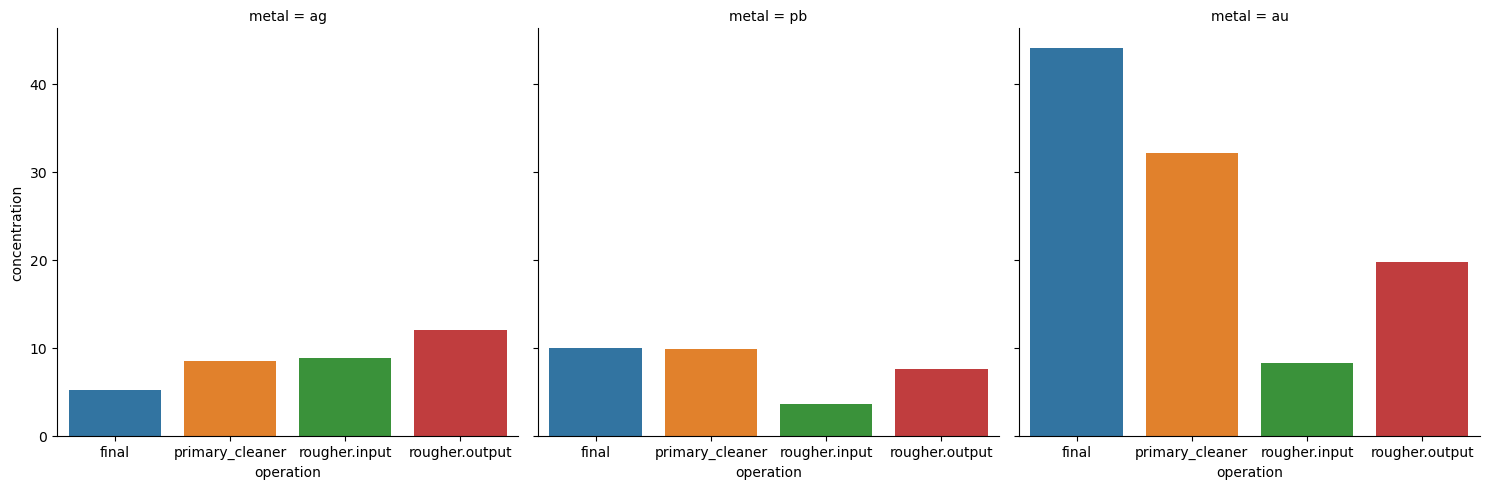

In [24]:
# Построим графики изменения концентрации метеллов на каждом этапе
sns.catplot(data = operations_df, col = 'metal', kind = 'bar', x = 'operation', y = 'concentration')

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках. 

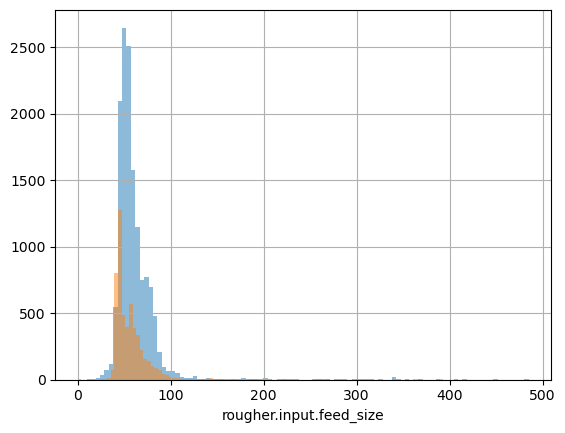

In [25]:
# Построим график для сравнения распределения гранул сырья
train_df['rougher.input.feed_size'].hist(bins = 100, alpha = 0.5, label = 'train')
test_df['rougher.input.feed_size'].hist(bins = 100, alpha = 0.5, label = 'test')
plt.xlabel('rougher.input.feed_size')
plt.show()

По гистограмме можно сделать вывод, что распределения в тестовой и тренировочной выборке не сильно отличаются, учитывая большое количество наблюдений для обучающей выборки. В тренировочной выборке преобладают значения близкие к порогу 60, а в тестовой основная масса значений находится в пределах порога 50.

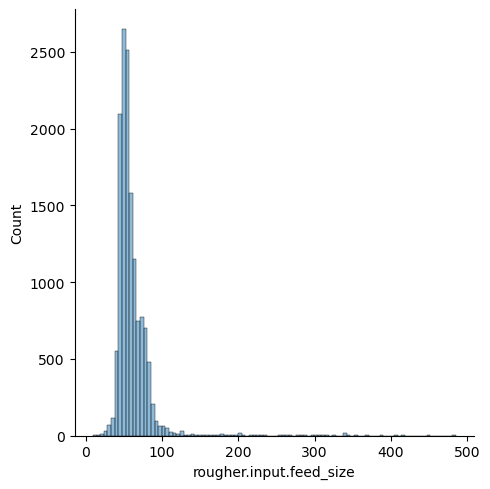

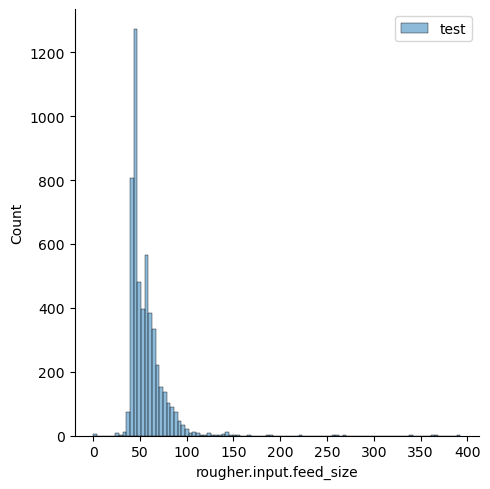

In [26]:
sns.displot(data=train_df, x='rougher.input.feed_size', bins=100, alpha=0.5, label='train')
sns.displot(data=test_df, x='rougher.input.feed_size', bins=100, alpha=0.5, label='test')
plt.xlabel('rougher.input.feed_size')
plt.legend()
plt.show()

### Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

In [27]:
# Посчитаем суммарную концентрацию металлов (ag, pb, sol, au) в сырье
sum_rougher_feed = full_df[['rougher.input.feed_ag', 'rougher.input.feed_pb',
                    'rougher.input.feed_sol', 'rougher.input.feed_au']].sum(axis = 1)

In [28]:
# Строим гистограмму для суммарной концентрации металлов в сырье
plt.show()
plt.subplots(figsize = (15,5))
sns.histplot(sum_rougher_feed, fill = True, bins = 100,)

<AxesSubplot:ylabel='Count'>

In [29]:
# Посчитаем суммарную концентрацию металлов (ag, pb, sol, au) в черновом концентрате
sum_rougher_concentrate = full_df[['rougher.output.concentrate_pb', 
                   'rougher.output.concentrate_ag', 
                   'rougher.output.concentrate_sol', 
                   'rougher.output.concentrate_au']].sum(axis = 1)

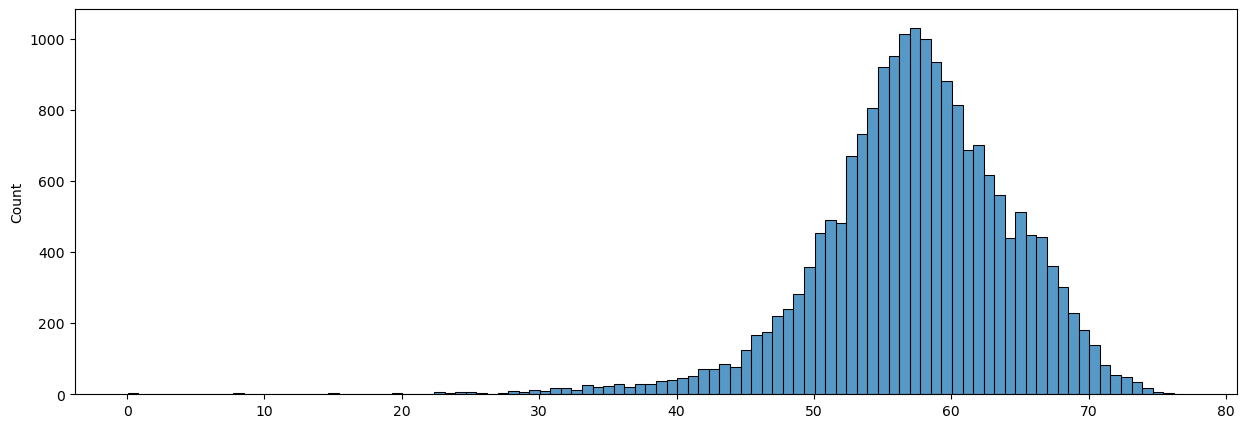

<AxesSubplot:ylabel='Count'>

In [30]:
# Строим гистограмму для суммарной концентрации металлов в черновом концентрате
plt.show()
plt.subplots(figsize = (15,5))
sns.histplot(sum_rougher_concentrate, fill = True, bins = 100)

In [31]:
# Посчитаем суммарную концентрацию металлов (ag, pb, sol, au) в первичной очистке
sum_primary_cleaner = full_df[['primary_cleaner.output.concentrate_pb', 
                   'primary_cleaner.output.concentrate_ag', 
                   'primary_cleaner.output.concentrate_sol', 
                   'primary_cleaner.output.concentrate_au']].sum(axis = 1)

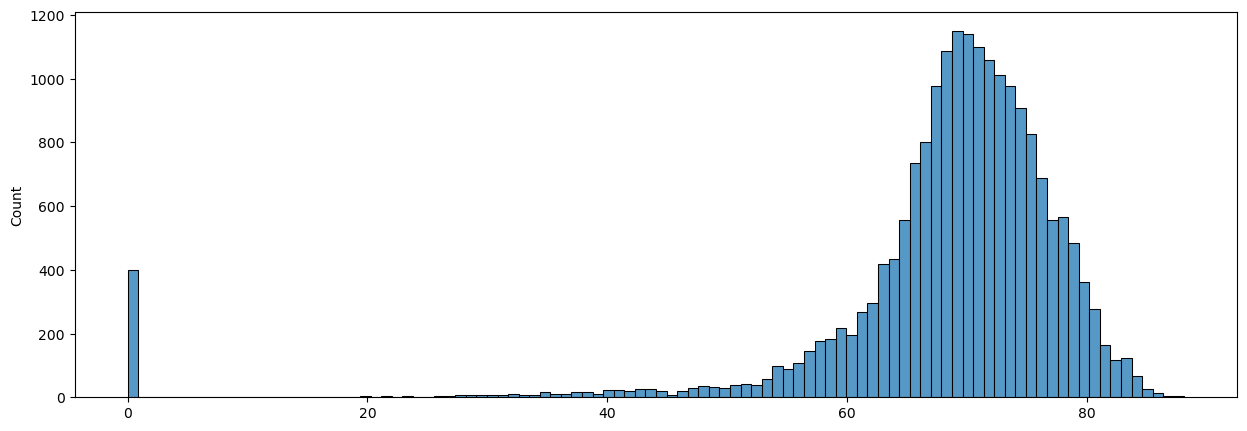

<AxesSubplot:ylabel='Count'>

In [32]:
# Строим гистограмму для суммарной концентрации металлов в первичной очистке
plt.show()
plt.subplots(figsize = (15,5))
sns.histplot(sum_primary_cleaner, fill = True, bins = 100)

In [33]:
# Посчитаем суммарную концентрацию металлов (ag, pb, sol, au) в финальном концентрате
sum_final_concentrate = full_df[['final.output.concentrate_pb', 
                   'final.output.concentrate_ag', 
                   'final.output.concentrate_sol', 
                   'final.output.concentrate_au']].sum(axis = 1)

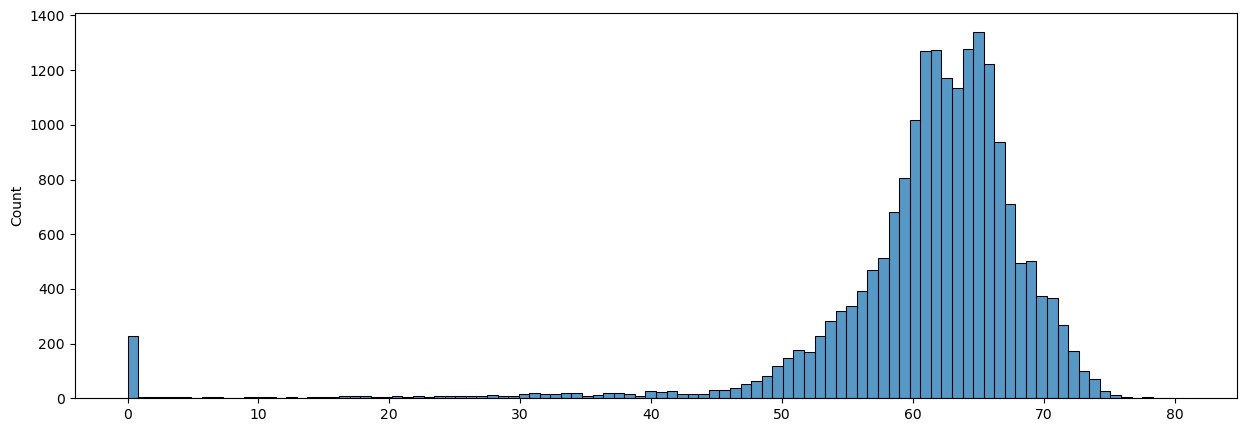

<AxesSubplot:ylabel='Count'>

In [34]:
# Строим гистограмму для суммарной концентрации металлов в финальном концентрате
plt.show()
plt.subplots(figsize = (16,8))
sns.histplot(sum_final_concentrate, fill = True, bins = 100)

По всем гистограммам видно, с каждым этапом растет хвост выбросов. Чтобы они не повлияли на качество работы моделей от них нужно избавиться.

In [35]:
# Создадим датафрейм и добавим в него новые столбцы с суммарной концентрацией

full_df_sum = full_df[metal_columns]

full_df_sum['rougher.input'] = sum_rougher_feed

full_df_sum['rougher.output'] = sum_rougher_concentrate

full_df_sum['primary_cleaner'] = sum_primary_cleaner

full_df_sum['final'] = sum_final_concentrate

full_df_sum.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_au,rougher.input,rougher.output,primary_cleaner,final
0,6.055403,9.889648,42.192020,8.547551,10.389648,34.174427,6.100378,2.284912,6.486150,11.500771,7.101074,19.793808,51.680034,66.424950,72.640924,63.644396
1,6.029369,9.968944,42.701629,8.558743,10.497069,34.118526,6.161113,2.266033,6.478583,11.615865,7.278807,20.050975,50.659114,67.012710,72.543485,63.957723
2,6.055926,10.213995,42.657501,8.603505,10.354494,33.969464,6.116455,2.159622,6.362222,11.695753,7.216833,19.737170,50.609929,66.103793,72.095042,64.311180
3,6.047977,9.977019,42.689819,7.221879,8.496563,28.260743,6.043309,2.037807,6.118189,11.915047,7.175616,19.320810,51.061546,65.752751,59.957723,63.573449
4,6.148599,10.142511,42.774141,9.089428,9.986786,33.044932,6.060915,1.786875,5.663707,12.411054,7.240205,19.216101,47.859163,65.908382,71.321010,64.004667


In [36]:
# Избавимся от выбросов в обучающей и тестовой выборках

full_df_sum = full_df_sum[(full_df_sum['rougher.input'] > 0) & 
                      (full_df_sum['rougher.output'] > 0) & 
                      (full_df_sum['primary_cleaner'] > 0) & 
                      (full_df_sum['final'] > 0)]

df = full_df.loc[full_df_sum.index]['date']

train = train_df.query('date in @df')
test = test_df.query('date in @df')

#### Вывод:

1. С каждым этапом мы наблюдаем, что концентрация золота возрастает.

2. Распределение размеров гранул сырья в обучающей и тестовой выборках практически одинаковое.

3. Обучающая и тренировочная выборки очищены от выбросов.

## Модель

In [37]:
RANDOM_STATE = np.random.RandomState(12345)

In [38]:
# Напишем функции для расчета sMAPE
def smape(true, predict):
    true = np.array(true)
    predict = np.array(predict)
    total = 0
    for i in range(len(true)):
        total += abs(true[i] - predict[i]) / ((abs(true[i]) + abs(predict[i])) / 2)
    return total * 100 / len(true)


def total_smape(rougher_smape, final_smape):
    return 0.25 * rougher_smape + 0.75 * final_smape

# Сделаем метрику качества из функции smape
smape_score = make_scorer(smape, greater_is_better = False)

In [39]:
# Cоздадим датасет для целевых признаков, недостающих в тестовой выборке
target_test_df = full_df[['date', 'rougher.output.recovery', 'final.output.recovery']]
target_test_df.head()

,date,rougher.output.recovery,final.output.recovery
0,2016-01-15 00:00:00,87.107763,70.541216
1,2016-01-15 01:00:00,86.843261,69.266198
2,2016-01-15 02:00:00,86.842308,68.116445
3,2016-01-15 03:00:00,87.226430,68.347543
4,2016-01-15 04:00:00,86.688794,66.927016


In [40]:
# Добавим эти признаки в тестовую выборку из полной
test_df = test_df.merge(target_test_df, how = 'left', on = 'date')

# Удаляем столбец с датой
test_df.drop(['date'], axis = 1, inplace = True)

In [41]:
# Удалим из тренировочной выборки те признаки, которых нет в тестовой
train_df = train_df.drop(set(train_df.columns) - set(test_df.columns), axis = 1)

In [42]:
# Разделим обучающий и тренировочный датафреймы на признаки и 2 целевых признака
features_train = train_df.drop(['rougher.output.recovery', 'final.output.recovery'], axis = 1)
target_train_rougher = train_df['rougher.output.recovery']
target_train_final = train_df['final.output.recovery']

features_test = test_df.drop(['rougher.output.recovery', 'final.output.recovery'], axis = 1)
target_test_rougher = test_df['rougher.output.recovery']
target_test_final = test_df['final.output.recovery']

In [43]:
features_train.shape

(14149, 52)

In [44]:
target_train_rougher.shape

(14149,)

In [45]:
target_train_final.shape

(14149,)

In [46]:
features_test.shape

(5290, 52)

In [47]:
target_test_rougher.shape

(5290,)

In [48]:
target_test_final.shape

(5290,)

### Дерево решений

In [49]:
# Задаем гиперпараметры, которые будут использоваться в поиске
param_rougher_dt = {
    "max_depth": [1, 12],
    "max_features": randint(1, 12),
    "min_samples_leaf": randint(1, 12),
}

# Создаем модель дерево решений
dt = DecisionTreeRegressor(random_state = RANDOM_STATE)

# Используем RandomizedSearchCV для поиска гиперпараметров и выбора лучшей модели
dt_rougher_search = RandomizedSearchCV(dt, param_distributions = param_rougher_dt, n_iter = 50, cv = 5)

# Обучаем модель
dt_rougher_search.fit(features_train, target_train_rougher)

# Выводим лучшие параметры
print('Лучшие гиперпараметры:', dt_rougher_search.best_params_)


Лучшие гиперпараметры: {'max_depth': 1, 'max_features': 6, 'min_samples_leaf': 9}


In [50]:
# Задаем гиперпараметры, которые будут использоваться в поиске
param_final_dt = {
    "max_depth": [1, 12],
    "max_features": randint(1, 12),
    "min_samples_leaf": randint(1, 12),
}

# Создаем модель дерево решений
dt = DecisionTreeRegressor(random_state = RANDOM_STATE)

# Используем RandomizedSearchCV для поиска гиперпараметров и выбора лучшей модели
dt_final_search = RandomizedSearchCV(dt, param_distributions = param_final_dt, n_iter = 50, cv = 5)

# Обучаем модель
dt_final_search.fit(features_train, target_train_final)

# Выводим лучшие параметры
print('Лучшие гиперпараметры:', dt_final_search.best_params_)


Лучшие гиперпараметры: {'max_depth': 1, 'max_features': 7, 'min_samples_leaf': 2}


In [51]:
smape_rougher = np.mean(cross_val_score(
    DecisionTreeRegressor(max_depth = 1, min_samples_leaf = 3, max_features = 6, random_state = RANDOM_STATE),
    features_train, target_train_rougher, scoring = smape_score, cv = 5))

smape_final = np.mean(cross_val_score(
    DecisionTreeRegressor(max_depth = 1, min_samples_leaf = 2, max_features = 7, random_state = RANDOM_STATE),
    features_train, target_train_final, scoring = smape_score, cv = 5))

print(smape_rougher, smape_final)
print()
print('Итоговый sMAPE:', total_smape(smape_rougher, smape_final))



-12.253493343761527 -11.905581435936057

Итоговый sMAPE: -11.992559412892424


### Случайный лес


In [52]:
# Задаем гиперпараметры, которые будут использоваться в поиске
param_rougher_rf = {
    'n_estimators': [5, 30, 5],
    "max_depth": [1, 12],
    "max_features": randint(1, 12),
    "min_samples_leaf": randint(1, 12),
}

# Создаем моель случайного леса
rf = RandomForestRegressor(random_state = RANDOM_STATE)

# Используем RandomizedSearchCV для поиска гиперпараметров и выбора лучшей модели
rf_rougher_search = RandomizedSearchCV(rf, param_distributions = param_rougher_rf, n_iter = 50, cv = 5)

# Обучаем модель
rf_rougher_search.fit(features_train, target_train_rougher)

# Выводим лучшие параметры
print('Лучшие гиперпараметры:', rf_rougher_search.best_params_)


Лучшие гиперпараметры: {'max_depth': 12, 'max_features': 9, 'min_samples_leaf': 10, 'n_estimators': 30}


In [53]:
# Задаем гиперпараметры, которые будут использоваться в поиске
param_final_rf = {
    'n_estimators': [5, 30, 5],
    "max_depth": [1, 12],
    "max_features": randint(1, 12),
    "min_samples_leaf": randint(1, 12),
}

# Создаем моель случайного леса
rf = RandomForestRegressor(random_state = RANDOM_STATE)

# Используем RandomizedSearchCV для поиска гиперпараметров и выбора лучшей модели
rf_final_search = RandomizedSearchCV(rf, param_distributions = param_final_rf, n_iter = 50, cv = 5)

# Обучаем модель
rf_final_search.fit(features_train, target_train_final)

# Выводим лучшие параметры
print('Лучшие гиперпараметры:', rf_final_search.best_params_)

Лучшие гиперпараметры: {'max_depth': 12, 'max_features': 8, 'min_samples_leaf': 9, 'n_estimators': 30}


In [54]:
smape_rougher = np.mean(cross_val_score(
    RandomForestRegressor(n_estimators = 30, max_depth = 12, min_samples_leaf = 7, max_features = 9, random_state = RANDOM_STATE),
    features_train, target_train_rougher, scoring=smape_score,cv=5))

smape_final = np.mean(cross_val_score(
    RandomForestRegressor(n_estimators = 30, max_depth = 12, min_samples_leaf = 9, max_features = 10, random_state = RANDOM_STATE),
    features_train, target_train_final, scoring = smape_score, cv = 5))

print(smape_rougher, smape_final)
print()
print('Итоговый sMAPE:', total_smape(smape_rougher, smape_final))

-10.9686221842148 -10.034580605346553

Итоговый sMAPE: -10.268091000063615


### Линейная регрессия

In [55]:
# Создаем модель линейной регрессии
lr = LinearRegression()

# Диапазоны гиперпараметров для перебора
param_rougher_lr = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False]
}

# Используем RandomizedSearchCV для поиска по диапазону гиперпараметров и выбора лучшей модели
lr_rougher_search = RandomizedSearchCV(
    estimator = lr, param_distributions = param_rougher_lr, n_iter = 10, cv = 5, refit = True, n_jobs = 1)

# Запуск поиска лучшей модели
lr_rougher_search.fit(features_train, target_train_rougher)

# Результаты поиска лучшей модели
print("Best parameters for the model: ", lr_rougher_search.best_params_)

Best parameters for the model:  {'normalize': False, 'fit_intercept': True, 'copy_X': True}


In [56]:
# Создаем модель линейной регрессии
lr = LinearRegression()

# Диапазоны гиперпараметров для перебора
param_final_lr = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False]
}

# Используем RandomizedSearchCV для поиска по диапазону гиперпараметров и выбора лучшей модели
lr_final_search = RandomizedSearchCV(
    estimator = lr, param_distributions = param_final_lr, n_iter = 10, cv = 5, refit = True, n_jobs = 1)

# Запуск поиска лучшей модели
lr_rougher_search.fit(features_train, target_train_final)

# Результаты поиска лучшей модели
print("Best parameters for the model: ", lr_rougher_search.best_params_)

Best parameters for the model:  {'normalize': True, 'fit_intercept': False, 'copy_X': True}


In [57]:
smape_rougher = np.mean(cross_val_score(
    LinearRegression(normalize = False, fit_intercept = True, copy_X = True),
    features_train, target_train_rougher, scoring = smape_score, cv = 5))

smape_final = np.mean(cross_val_score(
    LinearRegression(normalize = True, fit_intercept = False, copy_X = True),
    features_train, target_train_final, scoring = smape_score, cv = 5))

print(smape_rougher, smape_final)
print()
print('Итоговый sMAPE:', total_smape(smape_rougher, smape_final))

-12.802483458481856 -12.08433465872364

Итоговый sMAPE: -12.263871858663194


#### Вывод

Лучший результат показала модель случайного леса

Итоговый sMAPE: -10.268091000063615

### Проверим лучшую модель на тестовой выборке

In [58]:
smape_rougher = np.mean(cross_val_score(
    RandomForestRegressor(n_estimators = 30, max_depth = 12, min_samples_leaf = 7, max_features = 9, random_state = RANDOM_STATE),
    features_test, target_test_rougher, scoring = smape_score, cv = 5))

smape_final = np.mean(cross_val_score(
    RandomForestRegressor(n_estimators = 30, max_depth = 12, min_samples_leaf = 9, max_features = 10, random_state = RANDOM_STATE),
    features_test, target_test_final, scoring = smape_score, cv = 5))

print(smape_rougher, smape_final)
print()
print('Итоговый sMAPE:', total_smape(smape_rougher, smape_final))

-9.243395934475666 -9.379590059085164

Итоговый sMAPE: -9.34554152793279


### Проверим модель на адекватность

In [59]:
smape_rougher = np.mean(cross_val_score(
    DummyRegressor(strategy = "median"),
    features_test, target_test_rougher, scoring = smape_score, cv = 5))

smape_final = np.mean(cross_val_score(
    DummyRegressor(strategy = "median"),
    features_test, target_test_final, scoring = smape_score, cv = 5))

print(smape_rougher, smape_final)
print()
print('Итоговый sMAPE:', total_smape(smape_rougher, smape_final))

-8.22063002247243 -9.462340738739774

Итоговый sMAPE: -9.151913059672937


## Вывод

1. В процессе подготовки данных были обнаружены пропуски. Мы их заполнили методом ffill потому что они могли повлиять на работу моделей. 

2. Во время анализа суммарной концентрации металлов были обнаружены выбросы. От них мы тоже избавилисть чтобы они не повлияли на качество работы моделей.

3. Написали функции для рассчета метрик sMAPE. 

4. Проверили модели на тренировочной выборке. Лучший результат показала модель случайного леса с параметрами:

Для rougher: 

n_estimators = 30, max_depth = 12, min_samples_leaf = 7, max_features = 9

Для final:

n_estimators = 30, max_depth = 12, min_samples_leaf = 9, max_features = 10

5. Проверили модель случайного леса с подобранными гиперпараметрами на тестовой выборки и получили результат:

Итоговый sMAPE: -9.34